In [1]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\Nishant\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


List of Numpy arrays for
- Morning
- Afternoon
- Evening
- Night

In [2]:
#list of morning , afternoon, evening and night
morning = []
afternoon = []
evening = []
night = []

In [6]:
for filename in os.listdir('Dataset/sunrise'):
  img = Image.open('Dataset/sunrise/'+filename)
  img = np.array(img)
  morning.append(img)

for filename in os.listdir('Dataset/daytime'):
  img = Image.open('Dataset/daytime/'+filename)
  img = np.array(img)
  afternoon.append(img)

for filename in os.listdir('Dataset/Evening'):
  img = Image.open('Dataset/Evening/'+filename)
  img = np.array(img)
  evening.append(img)

for filename in os.listdir('Dataset/nighttime'):
  img = Image.open('Dataset/nighttime/'+filename)
  img = np.array(img)
  night.append(img)

In [7]:
rows, columns, channels = morning[0].shape
total_pixels = rows * columns
print("Image Details:")
print(f"  Rows (Height): {rows}")
print(f"  Columns (Width): {columns}")
print(f"  Total pixels: {total_pixels}")
print(f"  Channels per pixel: {channels}")

Image Details:
  Rows (Height): 224
  Columns (Width): 224
  Total pixels: 50176
  Channels per pixel: 3


In [9]:
pixel_averages_morning = []
pixel_averages_afternoon = []
pixel_averages_evening = []
pixel_averages_night = []

for img in morning:
    pixel_average = np.mean(img, axis=2)
    pixel_averages_morning.append(pixel_average)

for img in afternoon:
    pixel_average = np.mean(img, axis=2)
    pixel_averages_afternoon.append(pixel_average)

for img in evening:
    pixel_average = np.mean(img, axis=2)
    pixel_averages_evening.append(pixel_average)

for img in night:
    pixel_average = np.mean(img, axis=2)
    pixel_averages_night.append(pixel_average)

In [10]:
pixel_averages_morning[0].shape

(224, 224)

In [11]:
pixel_averages_morning[0][0].shape

(224,)

In [12]:
morning[0][0][0]

array([136, 154, 168], dtype=uint8)

In [13]:
pixel_averages_morning[0][0][0]

152.66666666666666

In [15]:
def compute_single_average(images):
    average_intensities = []
    for img in images:
        single_intensity = np.mean(img)
        average_intensities.append(single_intensity)
    return average_intensities

morning_avg_intensity = compute_single_average(pixel_averages_morning)
afternoon_avg_intensity = compute_single_average(pixel_averages_afternoon)
evening_avg_intensity = compute_single_average(pixel_averages_evening)
night_avg_intensity = compute_single_average(pixel_averages_night)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

time_of_day=np.concatenate([np.zeros_like(morning_avg_intensity),np.ones_like(afternoon_avg_intensity),2*np.ones_like(evening_avg_intensity),3*np.ones_like(night_avg_intensity)])
intensity = np.concatenate((morning_avg_intensity, afternoon_avg_intensity, evening_avg_intensity, night_avg_intensity))


In [23]:
hist, xedges, yedges = np.histogram2d(time_of_day, intensity, bins=(4, 256))

In [24]:
import matplotlib.cm as cm

In [25]:
len(morning_avg_intensity)

50

In [26]:
#converting morning_avg_intensity, afternoon_avg_intensity list into numpy arrays morning_np , afternoon_np
morning_np = np.array(morning_avg_intensity)
afternoon_np = np.array(afternoon_avg_intensity)
evening_np = np.array(evening_avg_intensity)
night_np = np.array(night_avg_intensity)

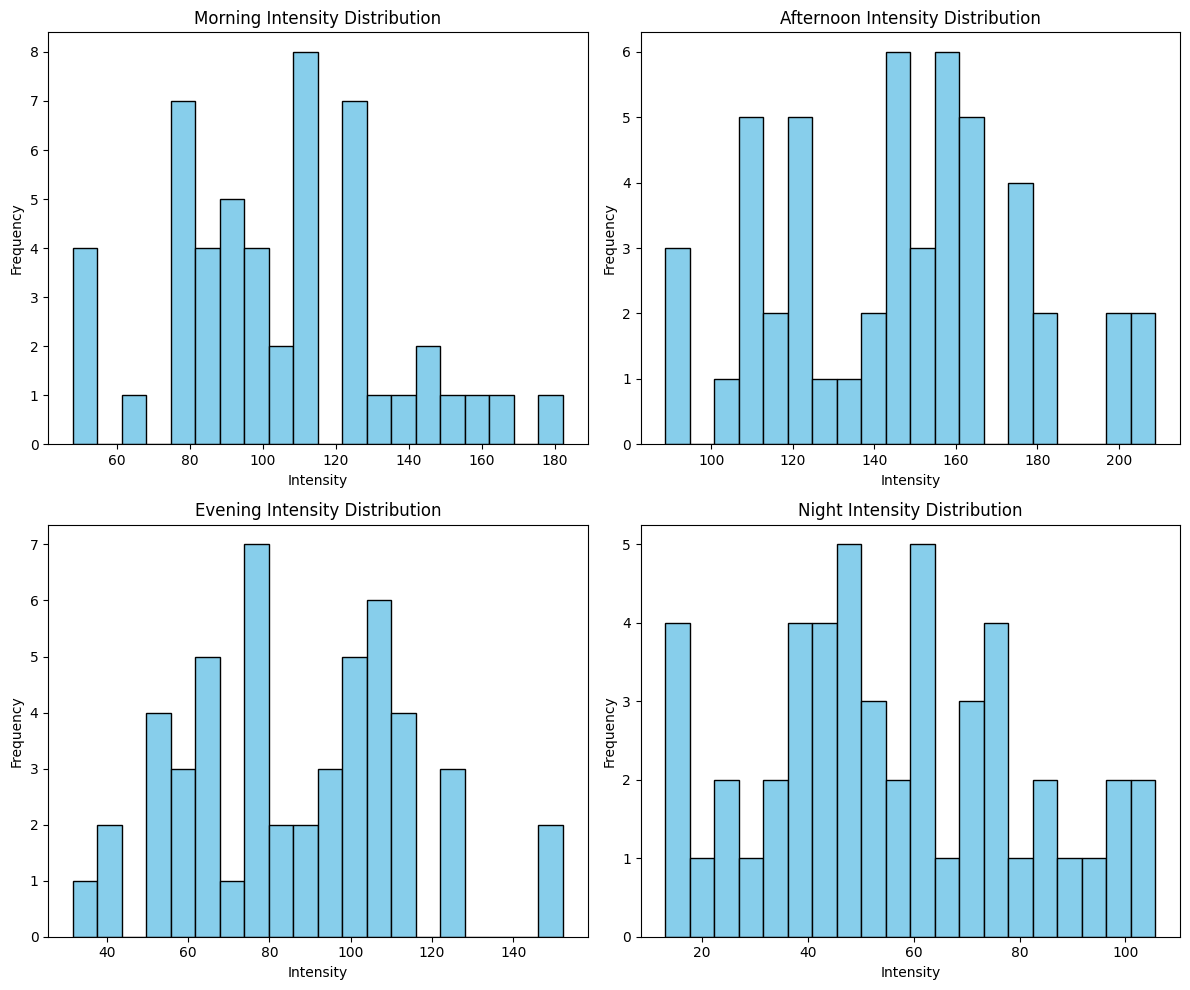

In [27]:
time_periods = {
    'Morning': morning_np,
    'Afternoon': afternoon_np,
    'Evening': evening_np,
    'Night': night_np
}

plt.figure(figsize=(12, 10))

for i, (time, data) in enumerate(time_periods.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{time} Intensity Distribution')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Nishant\AppData\Local\Temp\ipykernel_19596\2107762522.py:11: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use none, you no longer need to clean a Grouper instead.
  ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average',color=colors)


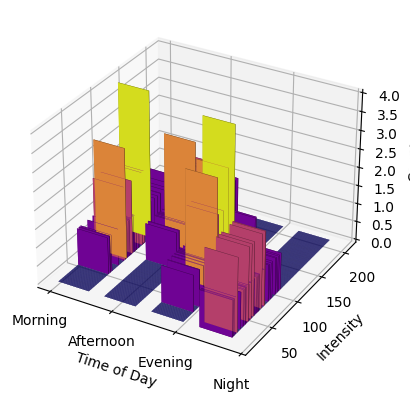

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5, yedges[:-1] + 0.5, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dz = hist.ravel()
norm=dz/dz.max()
colors=cm.plasma(norm)
dx = dy = 0.5 * np.ones_like(zpos)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average',color=colors)
ax.set_xlabel('Time of Day')
ax.set_ylabel('Intensity')
ax.set_zlabel('Count')
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_xticklabels(['Morning', 'Afternoon', 'Evening', 'Night'])

plt.show()

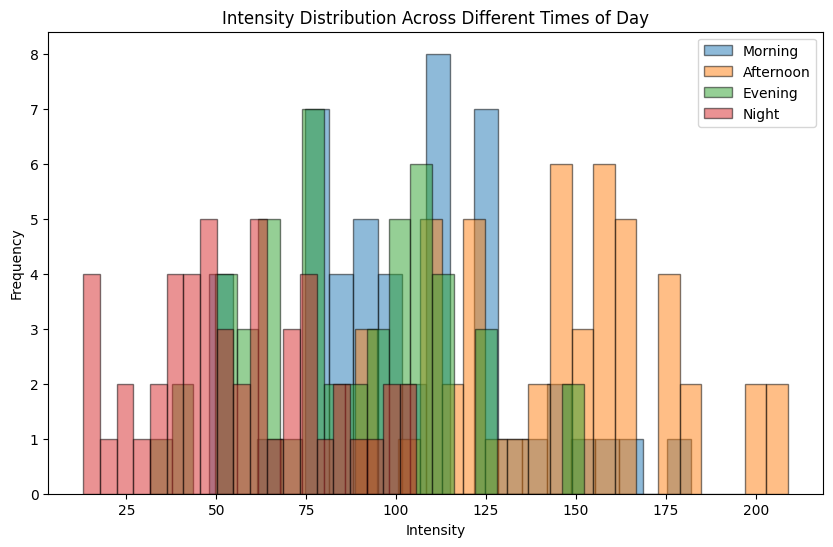

In [29]:
plt.figure(figsize=(10, 6))

plt.hist(morning_np, bins=20, alpha=0.5, label='Morning', edgecolor='black')
plt.hist(afternoon_np, bins=20, alpha=0.5, label='Afternoon', edgecolor='black')
plt.hist(evening_np, bins=20, alpha=0.5, label='Evening', edgecolor='black')
plt.hist(night_np, bins=20, alpha=0.5, label='Night', edgecolor='black')
plt.title('Intensity Distribution Across Different Times of Day')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# conditional probability

In [57]:
#list of morning , afternoon, evening and night
morning_new = []
afternoon_new = []
evening_new = []
night_new = []

In [58]:
for filename in os.listdir('/content/sunrise'):
  img = Image.open('/content/sunrise/'+filename)
  img = np.array(img)
  morning_new.append(img)

for filename in os.listdir('/content/daytime'):
  img = Image.open('/content/daytime/'+filename)
  img = np.array(img)
  afternoon_new.append(img)

for filename in os.listdir('/content/Evening'):
  img = Image.open('/content/Evening/'+filename)
  img = np.array(img)
  evening_new.append(img)

for filename in os.listdir('/content/nighttime'):
  img = Image.open('/content/nighttime/'+filename)
  img = np.array(img)
  night_new.append(img)

In [63]:
import numpy as np

sample_morning = []
sample_afternoon = []
sample_evening = []
sample_night = []

# xi,yi
pixel_positions = [(10, 10), (20, 20), (10, 20), (20, 10)]

def compute_pixel_intensities(img, positions):
    intensities = []
    for x, y in positions:
        R = img[x, y, 0]
        G = img[x, y, 1]
        B = img[x, y, 2]
        avg_intensity = (R + G + B) / 3
        intensities.append(avg_intensity)
    return np.array(intensities)

for img in morning_new[:50]:
    pixel_intensities = compute_pixel_intensities(img, pixel_positions)
    sample_morning.append(pixel_intensities)

for img in afternoon_new[:50]:
    pixel_intensities = compute_pixel_intensities(img, pixel_positions)
    sample_afternoon.append(pixel_intensities)

for img in evening_new[:50]:
    pixel_intensities = compute_pixel_intensities(img, pixel_positions)
    sample_evening.append(pixel_intensities)

for img in night_new[:50]:
    pixel_intensities = compute_pixel_intensities(img, pixel_positions)
    sample_night.append(pixel_intensities)

sample_morning = np.array(sample_morning)
sample_afternoon = np.array(sample_afternoon)
sample_evening = np.array(sample_evening)
sample_night = np.array(sample_night)

<ipython-input-63-46fa576ea75e>:19: RuntimeWarning: overflow encountered in scalar add
  avg_intensity = (R + G + B) / 3


In [62]:
morning_new[0][10][10]

array([106,  66,  75], dtype=uint8)

In [74]:
import numpy as np
from scipy.stats import gaussian_kde
from PIL import Image

In [75]:
kde_morning = gaussian_kde(np.array(sample_morning).T)
kde_afternoon = gaussian_kde(np.array(sample_afternoon).T)
kde_evening = gaussian_kde(np.array(sample_evening).T)
kde_night = gaussian_kde(np.array(sample_night).T)

In [76]:
def predict(image, pixel_positions):
    img = Image.open(image)
    img = np.array(img)

    pixel_intensities = compute_pixel_intensities(img, pixel_positions)

    p_morning = np.prod(kde_morning(pixel_intensities))
    p_afternoon = np.prod(kde_afternoon(pixel_intensities))
    p_evening = np.prod(kde_evening(pixel_intensities))
    p_night = np.prod(kde_night(pixel_intensities))

    prob_morning_given_I_mor = p_morning / (p_morning + p_afternoon + p_evening + p_night)
    prob_morning_given_I_aft = p_afternoon / (p_morning + p_afternoon + p_evening + p_night)
    prob_morning_given_I_eve = p_evening / (p_morning + p_afternoon + p_evening + p_night)
    prob_morning_given_I_nig = p_night / (p_morning + p_afternoon + p_evening + p_night)

    return prob_morning_given_I_mor, prob_morning_given_I_aft, prob_morning_given_I_eve, prob_morning_given_I_nig


In [79]:
image_path = '/content/sunrise/sunrise_13.jpeg'
pixel_positions = [(10, 10), (20, 20), (10, 20), (20, 10)]

prob_morning, prob_afternoon, prob_evening, prob_night = predict(image_path, pixel_positions)

print(f"Probability that the image is from the morning: {prob_morning:.4f}")
print(f"Probability that the image is from the afternoon: {prob_afternoon:.4f}")
print(f"Probability that the image is from the evening: {prob_evening:.4f}")
print(f"Probability that the image is from the night: {prob_night:.4f}")

Probability that the image is from the morning: 0.2995
Probability that the image is from the afternoon: 0.2332
Probability that the image is from the evening: 0.1903
Probability that the image is from the night: 0.2769


<ipython-input-63-46fa576ea75e>:19: RuntimeWarning: overflow encountered in scalar add
  avg_intensity = (R + G + B) / 3


<ipython-input-63-46fa576ea75e>:19: RuntimeWarning: overflow encountered in scalar add
  avg_intensity = (R + G + B) / 3


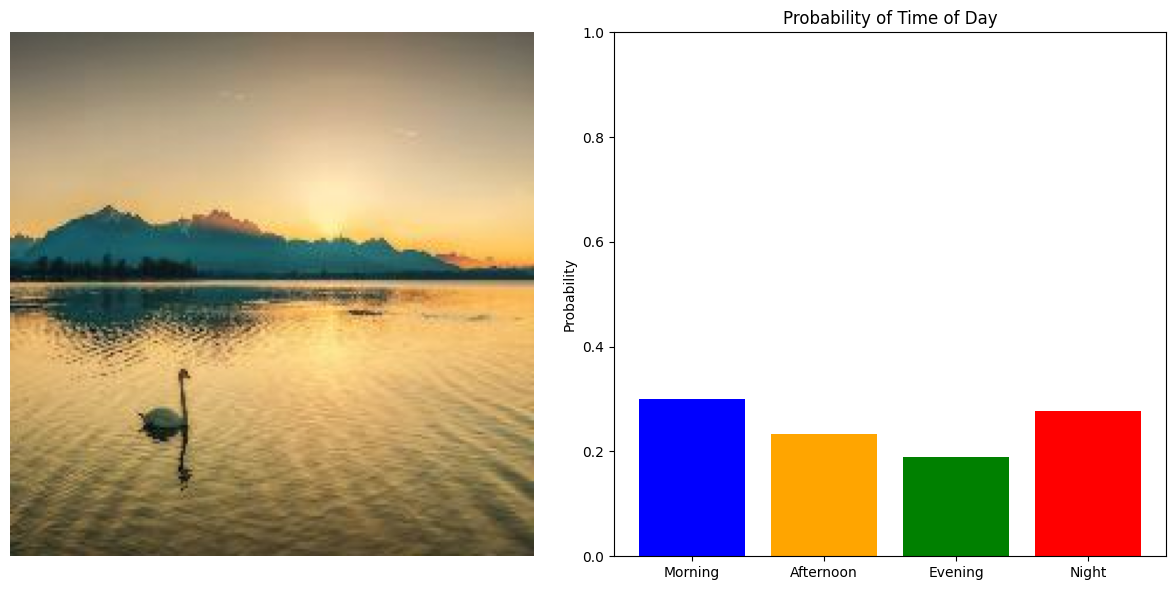

In [80]:
# Get the probabilities
prob_morning, prob_afternoon, prob_evening, prob_night = predict(image_path, pixel_positions)

# Plot the image and the bar graph
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the image on the left
img = Image.open(image_path)
ax[0].imshow(img)
ax[0].axis('off')  # Hide the axes for the image

# Plot the bar graph on the right
times_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']
probabilities = [prob_morning, prob_afternoon, prob_evening, prob_night]
ax[1].bar(times_of_day, probabilities, color=['blue', 'orange', 'green', 'red'])

# Set the labels and title
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('Probability')
ax[1].set_title('Probability of Time of Day')

plt.tight_layout()
plt.show()